***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [164]:
df = pd.read_csv('pnad.csv')

### Visualize o conteúdo do DataFrame

In [165]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [166]:
salario_minimo = 788  # Valor do salário mínimo na época
classes_renda = [
    0, 
    2 * salario_minimo, 
    5 * salario_minimo, 
    15 * salario_minimo, 
    25 * salario_minimo, 
    float('inf')
]

### 2º Definir os labels das classes

In [167]:
labels_renda = [
    "E Até 2 SM",
    "D De 2 a 5 SM",
    "C De 5 a 15 SM",
    "B De 15 a 25 SM",
    "A Acima de 25 SM"
]

### 3º Construir a coluna de frequências

In [168]:
df['Classe Renda'] = pd.cut(df['Renda'], bins=classes_renda, labels=labels_renda, right=False)
frequencias = df['Classe Renda'].value_counts().sort_index()

### 4º Construir a coluna de percentuais

In [169]:
percentuais = frequencias / frequencias.sum() * 100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [170]:
tabela_frequencias = pd.DataFrame({
    'Frequência': frequencias,
    'Percentual (%)': percentuais
})

# Exibir a tabela de frequências
tabela_frequencias.reset_index(inplace=True)
tabela_frequencias.rename(columns={'index': 'Classe de Renda'}, inplace=True)
print(tabela_frequencias)

       Classe Renda  Frequência  Percentual (%)
0        E Até 2 SM       49357       64.233472
1     D De 2 a 5 SM       18972       24.690265
2    C De 5 a 15 SM        7268        9.458615
3   B De 15 a 25 SM         823        1.071057
4  A Acima de 25 SM         420        0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

C:\Users\Yuki\AppData\Local\Temp\ipykernel_18560\1554746424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


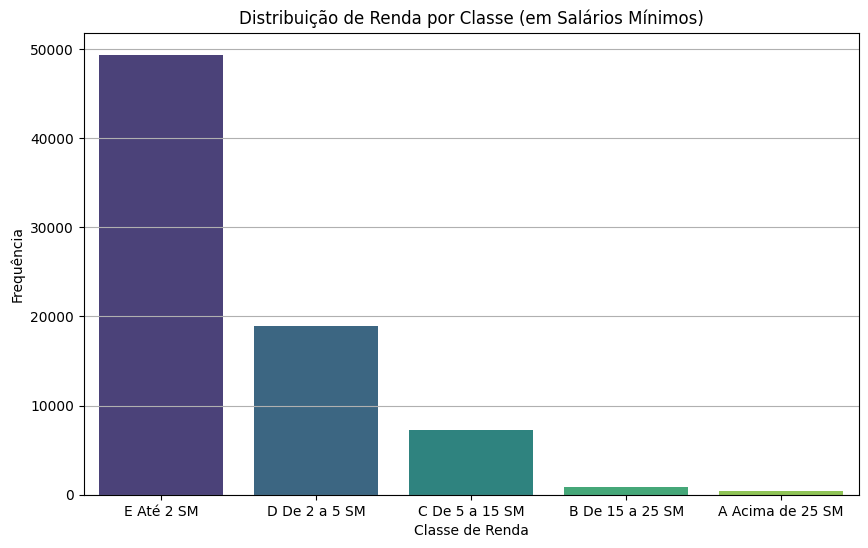

In [171]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Classe Renda', 
    y='Frequência', 
    data=tabela_frequencias, 
    palette='viridis'
)
plt.title("Distribuição de Renda por Classe (em Salários Mínimos)")
plt.ylabel("Frequência")
plt.xlabel("Classe de Renda")
plt.grid(axis='y')
plt.show()

> ### Conclusões

A análise da renda mostra que a maior parte da população (64,23%) ganha até 2 salários mínimos, indicando uma concentração significativa na base da distribuição. 24,69% estão na faixa de 2 a 5 salários mínimos, enquanto apenas 9,46% recebem entre 5 e 15 salários mínimos. As classes superiores, com rendas entre 15 e 25 salários mínimos (1,07%) ou acima de 25 salários mínimos (0,55%), representam uma parcela muito pequena da população, o que deixa evidente a desigualdade social.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

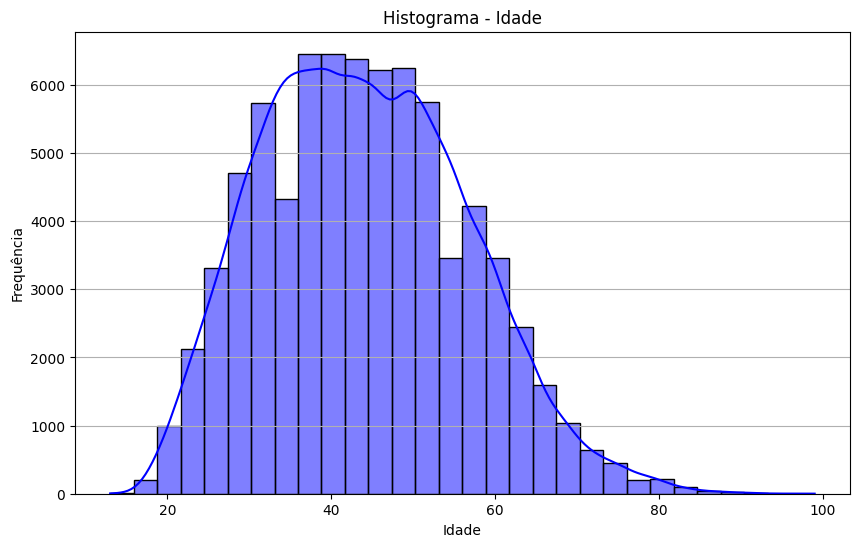

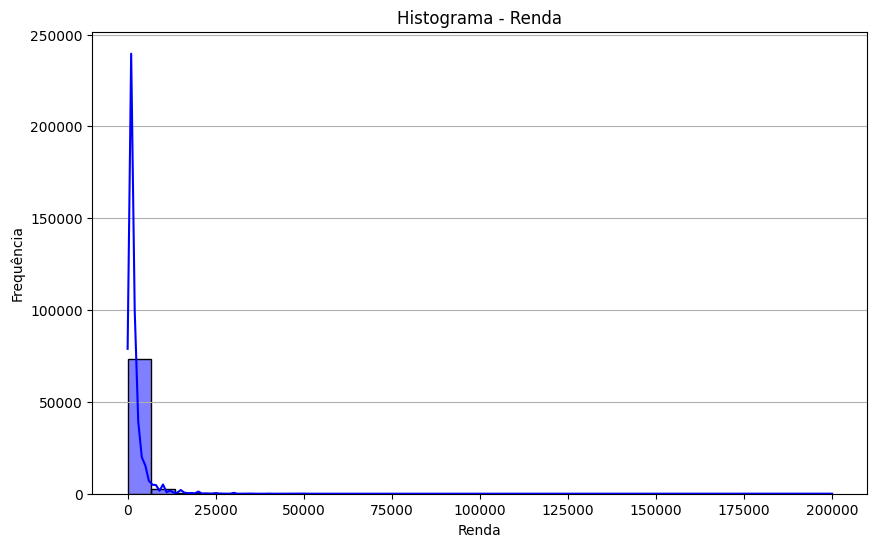

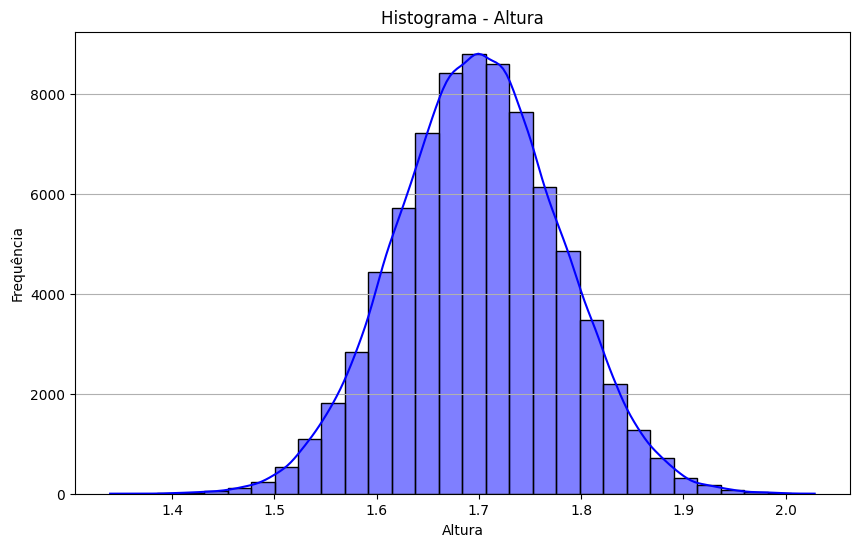

In [172]:
# Selecionar variáveis quantitativas
variaveis_quantitativas = ['Idade', 'Renda', 'Altura']

# Criar histogramas para cada variável
for var in variaveis_quantitativas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f"Histograma - {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.grid(axis='y')
    plt.show()


> ### Conclusões

Os gráficos mostram padrões bem distintos sobre a população analisada. O histograma da idade apresenta uma distribuição quase simétrica, com maior concentração por volta dos 40 anos, indicando que a maioria das pessoas está em uma faixa etária produtiva. Já o histograma da renda é bem diferente, com uma forte assimetria à direita. A maior parte da população está concentrada em rendimentos baixos, enquanto poucas pessoas possuem rendas muito altas, o que destaca uma clara desigualdade econômica. Por outro lado, o histograma da altura mostra uma distribuição simétrica, centrada em torno de 1,7 metros, o que é esperado para variáveis biológicas. De forma geral, os gráficos mostram desigualdade na renda, enquanto idade e altura seguem padrões mais equilibrados e previsíveis.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

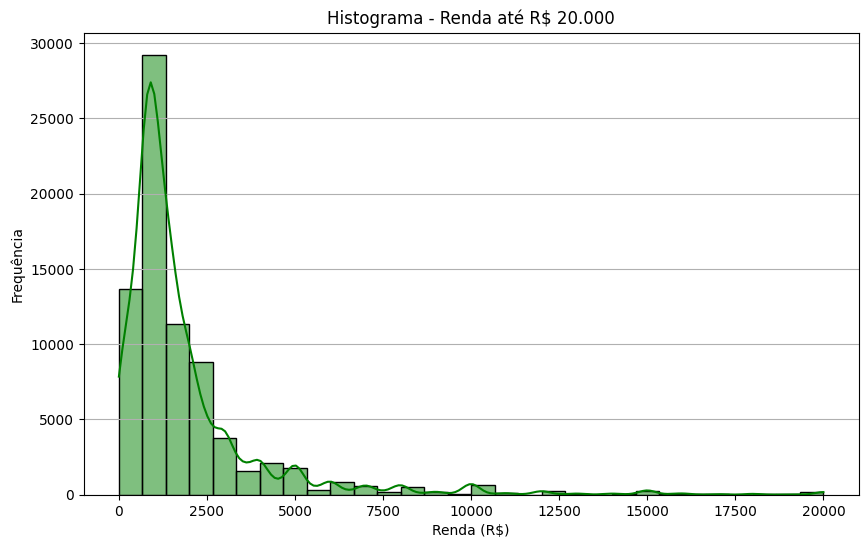

In [173]:
# Filtrar dados de renda até R$ 20.000
renda_filtrada = df[df['Renda'] <= 20000]

# Criar histograma
plt.figure(figsize=(10, 6))
sns.histplot(renda_filtrada['Renda'], kde=True, bins=30, color='green', edgecolor='black')
plt.title("Histograma - Renda até R$ 20.000")
plt.xlabel("Renda (R$)")
plt.ylabel("Frequência")
plt.grid(axis='y')
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [174]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [175]:
# Dicionários para renomear
sexo = {0: 'Masculino', 1: 'Feminino'}
cor = {
    0: 'Indígena', 2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 9: 'Sem declaração'
}

# Tabela cruzada de frequências
tabela_cruzada = pd.crosstab(df['Sexo'], df['Cor'])
tabela_cruzada.rename(index=sexo, columns=cor, inplace=True)

# Tabela cruzada de percentuais
percentuais_cruzados = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Exibir tabelas
print("Tabela de Frequências:")
print(tabela_cruzada)
print("\nTabela de Percentuais (%):")
print(percentuais_cruzados)


Tabela de Frequências:
Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862

Tabela de Percentuais (%):
Cor        Indígena     Branca      Preta   Amarela      Parda
Sexo                                                          
Masculino  0.480751  41.678873  10.332394  0.441315  47.066667
Feminino   0.428148  40.784231  12.246715  0.495973  46.044934


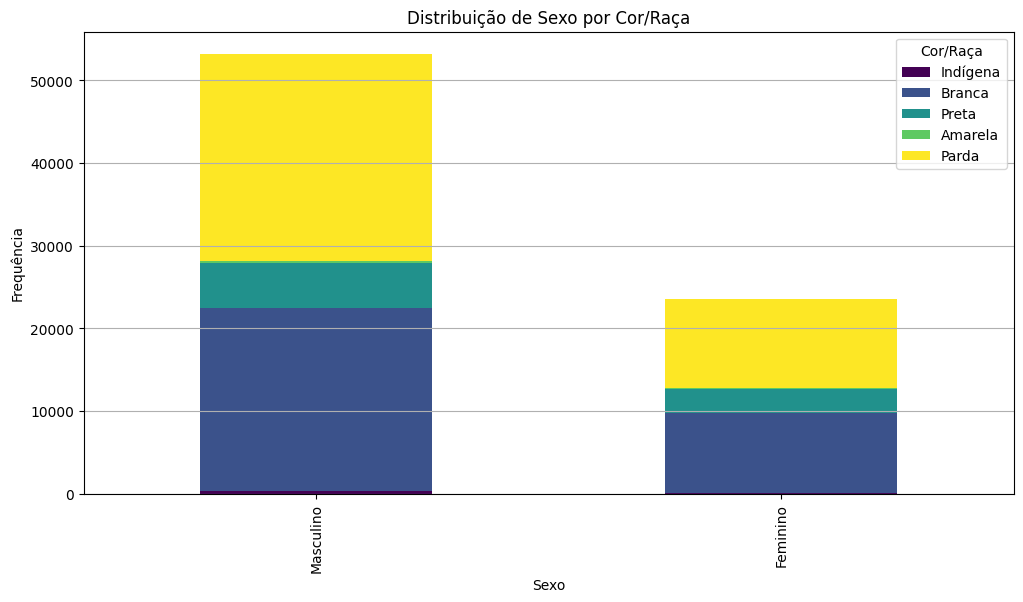

In [176]:
# Gráfico de barras empilhadas para a tabela cruzada
tabela_cruzada.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Distribuição de Sexo por Cor/Raça")
plt.ylabel("Frequência")
plt.xlabel("Sexo")
plt.legend(title="Cor/Raça")
plt.grid(axis='y')
plt.show()

> ### Conclusões

A análise mostra que a maioria das pessoas, tanto homens quanto mulheres, se identifica como parda ou branca. Entre os homens, 47,07% são pardos e 41,68% brancos, enquanto entre as mulheres, 46,04% são pardas e 40,78% brancas. Grupos como indígenas e amarelos têm uma representatividade bem menor, com os indígenas representando menos de 0,5% para ambos os sexos. Já as pessoas pretas correspondem a 10,33% dos homens e 12,25% das mulheres, com uma leve diferença de proporção entre os dois grupos. No geral, a distribuição é bastante parecida entre homens e mulheres, refletindo as características demográficas do país.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [177]:
renda = df['Renda']
media = renda.mean()
print(f"Média: {media:.2f}")


Média: 2000.38


### Obtenha a mediana

In [178]:
mediana = renda.median()
print(f"Mediana: {mediana:.2f}")


Mediana: 1200.00


### Obtenha a moda

In [179]:
moda = renda.mode()[0]
print(f"Moda: {moda:.2f}")

Moda: 788.00


### Obtenha o desvio médio absoluto

In [180]:
desvio_medio_absoluto = (renda - renda.mean()).abs().mean()
print(f"Desvio Médio Absoluto: {desvio_medio_absoluto:.2f}")

Desvio Médio Absoluto: 1526.50


### Obtenha a variância

In [181]:
variancia = renda.var()
print(f"Variância: {variancia:.2f}")

Variância: 11044906.01


### Obtenha o desvio-padrão

In [182]:
desvio_padrao = renda.std()
print(f"Desvio-Padrão: {desvio_padrao:.2f}")

Desvio-Padrão: 3323.39


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [183]:
# Média, mediana e valor máximo da variável RENDA segundo SEXO e COR
sexo_cor_estatisticas = pd.crosstab(
    df['Sexo'], 
    df['Cor'], 
    values=df['Renda'], 
    aggfunc={'mean', 'median', 'max'}
)

# Exibir resultados
print("\nMédia, Mediana e Valor Máximo por Sexo e Cor:")
print(sexo_cor_estatisticas)


Média, Mediana e Valor Máximo por Sexo e Cor:
         max                                       mean               \
Cor        0       2      4      6       8            0            2   
Sexo                                                                   
0      10000  200000  50000  50000  100000  1081.710938  2925.744435   
1     120000  100000  23000  20000   30000  2464.386139  2109.866750   

                                            median                          \
Cor             4            6            8      0       2       4       6   
Sexo                                                                         
0     1603.861687  4758.251064  1659.577425  797.5  1700.0  1200.0  2800.0   
1     1134.596400  3027.341880  1176.758516  788.0  1200.0   800.0  1500.0   

              
Cor        8  
Sexo          
0     1200.0  
1      800.0  


> ### Conclusões

A análise mostra diferenças importantes na renda entre os grupos de sexo e cor. Entre os homens, a maior renda máxima está entre os brancos (R$ 200.000), enquanto, entre as mulheres, os indígenas têm a maior renda máxima (R$ 120.000). Em relação à média, os homens brancos possuem a maior renda (R$ 2.925,74), enquanto, entre as mulheres, as brancas também lideram, mas com uma média menor (R$ 2.109,87).

Na mediana, os homens brancos têm um valor maior (R$ 1.700,00), seguidos pelos amarelos (R$ 2.800,00), enquanto as mulheres apresentam medianas mais uniformes, com destaque para as brancas (R$ 1.200,00) e pardas (R$ 800,00).

De forma geral, os homens têm rendas superiores às das mulheres na maioria dos grupos, o que reforça tanto a desigualdade de gênero quanto as diferenças de rendimento entre os grupos raciais.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [184]:
sexo_cor_dispersao = df.groupby(['Sexo', 'Cor'])['Renda'].agg(
    mad=lambda x: (x - x.mean()).abs().mean(),  # Desvio Médio Absoluto
    var='var',  # Variância
    std='std'   # Desvio Padrão
).reset_index()

# Exibir resultados
print("\nMedidas de Dispersão por Sexo e Cor:")
print(sexo_cor_dispersao)



Medidas de Dispersão por Sexo e Cor:
   Sexo  Cor          mad           var           std
0     0    0   798.910889  1.449841e+06   1204.093490
1     0    2  2261.012346  2.257002e+07   4750.791872
2     0    4   975.602482  3.749294e+06   1936.309271
3     0    6  3709.597211  3.295707e+07   5740.824820
4     0    8  1125.827704  5.345747e+06   2312.087184
5     1    0  3007.892952  1.429818e+08  11957.498292
6     1    2  1670.967106  1.056909e+07   3251.013154
7     1    4   705.453357  1.821960e+06   1349.799809
8     1    6  2549.146322  1.392166e+07   3731.173660
9     1    8   811.580946  2.547960e+06   1596.233048


> ### Conclusões

A análise das medidas de dispersão mostra que a renda varia bastante entre os grupos de sexo e cor, com os homens apresentando maior variabilidade na maioria dos casos. O grupo masculino de cor amarela tem o maior desvio-padrão (R$ 5.740,82) e a maior variância (R$ 32.957.070), enquanto entre as mulheres, o maior desvio-padrão é das indígenas (R$ 11.957,50), que também possuem a maior variância (R$ 142.981.800).

O MAD reforça essas diferenças, sendo mais alto para os homens amarelos (R$ 3.709,60) e para as mulheres indígenas (R$ 3.007,89). Já os grupos com menor dispersão são os homens indígenas (R$ 1.204,09) e as mulheres pretas (R$ 1.349,80), indicando que nesses grupos a renda é mais uniforme.

Esses resultados mostram que, além das diferenças médias de rendimento, alguns grupos, como mulheres indígenas e homens amarelos, apresentam uma desigualdade interna muito maior, enquanto outros, como homens indígenas e mulheres pretas, têm uma renda mais consistente dentro do grupo.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

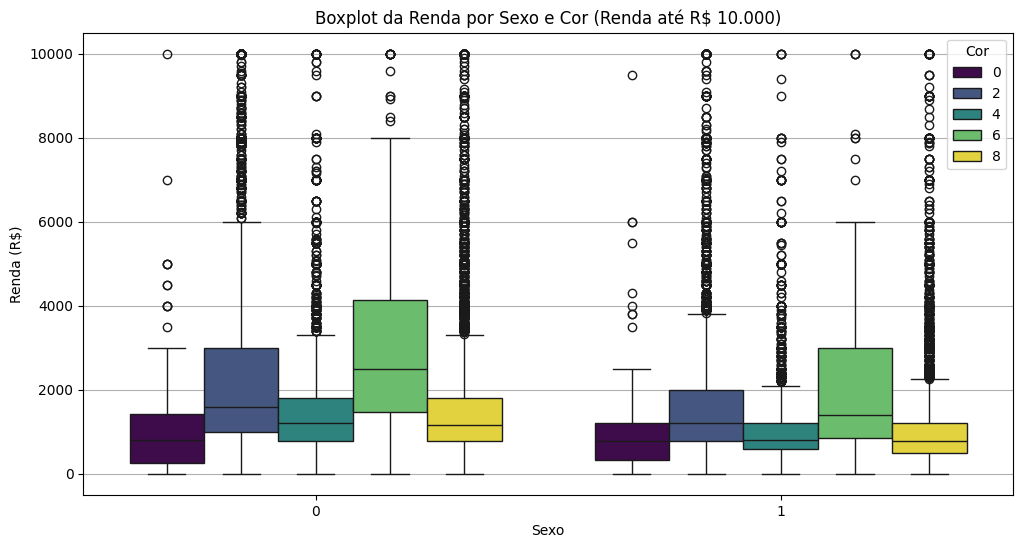

In [185]:
# Filtrar para rendas até R$ 10.000
renda_filtrada = df[df['Renda'] <= 10000]

# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Sexo', 
    y='Renda', 
    hue='Cor', 
    data=renda_filtrada, 
    palette='viridis'
)
plt.title("Boxplot da Renda por Sexo e Cor (Renda até R$ 10.000)")
plt.xlabel("Sexo")
plt.ylabel("Renda (R$)")
plt.grid(axis='y')
plt.show()

> ### Conclusões

O boxplot da renda por sexo e cor (com valores até R$ 10.000) mostra algumas diferenças interessantes entre os grupos. Em geral, os homens apresentam rendas ligeiramente maiores do que as mulheres na maioria das categorias de cor, o que reflete uma desigualdade de gênero.

Entre os homens, o grupo amarelo se destaca com os valores mais altos, seguido pelos brancos. Já entre as mulheres, o padrão é semelhante, mas com valores centrais e dispersões mais baixos. Os grupos indígenas têm os menores valores de renda em ambos os sexos.

Além disso, a presença de outliers em praticamente todos os grupos indica que existem pessoas com rendas muito acima da maioria. No entanto, os valores centrais (mediana) confirmam que as diferenças de renda são mais expressivas entre os grupos de cor e sexo do que dentro de cada grupo.

No geral, o gráfico reforça tanto a desigualdade de gênero quanto as diferenças de rendimento entre as categorias de cor/raça.